In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from tqdm import tqdm_notebook

from itertools import product

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)

%matplotlib inline

DATAPATH = 'C:\Meet College\Water Conservation Analysis\Consumption.csv'

data = pd.read_csv(DATAPATH, index_col=['Time'], parse_dates=['Time'])
data

,Consumption,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
Time,,,,,,,,,,,,,
2008-01-01,51.989932,NaN,3.951050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-02-01,29.989506,NaN,3.400848,-0.550203,NaN,NaN,NaN,NaN,17.718,30.754100,NaN,13.036100,169.939903
2008-03-01,32.537221,NaN,3.482385,0.081537,NaN,NaN,NaN,NaN,17.62668,30.405578,NaN,12.778898,163.300223
2008-04-01,33.124653,NaN,3.500278,0.017893,NaN,NaN,NaN,NaN,17.535,26.398191,NaN,8.863191,78.556159
2008-05-01,58.677958,NaN,4.072064,0.571786,NaN,NaN,NaN,NaN,17.4453,28.914722,NaN,11.469422,131.547643
2008-06-01,109.197133,NaN,4.693155,0.621091,NaN,NaN,NaN,NaN,17.355,27.870398,NaN,10.515398,110.573596
2008-07-01,141.035963,NaN,4.949015,0.255860,NaN,NaN,NaN,NaN,17.265,39.111620,NaN,21.846620,477.274807
2008-08-01,74.388507,NaN,4.309301,-0.639713,NaN,NaN,NaN,NaN,17.1769,41.501222,NaN,24.324322,591.672635
2008-09-01,31.819248,NaN,3.460071,-0.849230,NaN,NaN,NaN,NaN,17.088,57.455500,NaN,40.367500,1629.535060


In [2]:
drop_cols = [ 'Unnamed: 2','Unnamed: 3', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8','Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12','Unnamed: 13']

data.drop(drop_cols, axis=1, inplace=True)

data.head()

,Consumption
Time,
2008-01-01,51.989932
2008-02-01,29.989506
2008-03-01,32.537221
2008-04-01,33.124653
2008-05-01,58.677958


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2008-01-01 to 2017-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  120 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB


In [79]:
# Here no null values

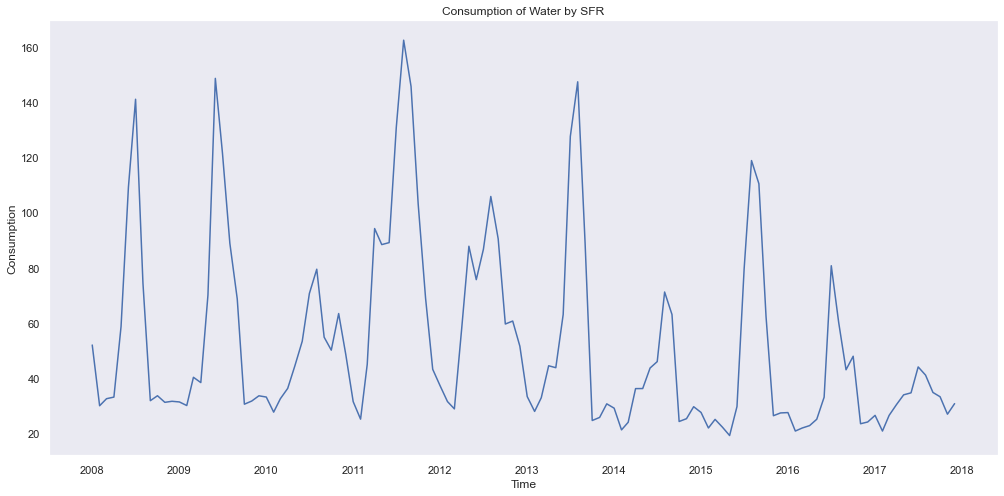

KeyError: 'Time'

In [4]:
# Plot closing price

plt.figure(figsize=(17, 8))
plt.plot(data)
plt.title('Consumption of Water by SFR')
plt.ylabel('Consumption')
plt.xlabel('Time')
plt.grid(False)
plt.show()
data['Time'] = pd.to_datetime(data['Time'])
data.set_index('Time', inplace=True) #set date as index
data.head()

In [ ]:
# Moving Average

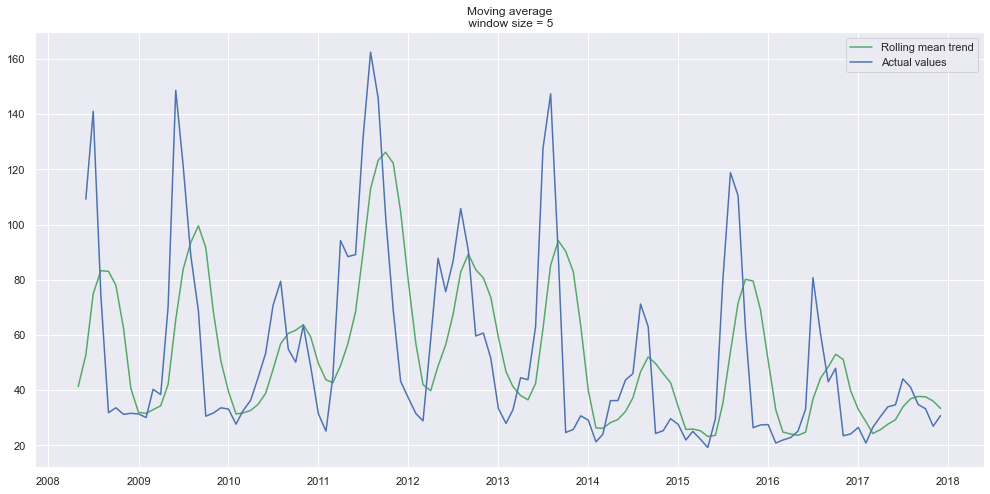

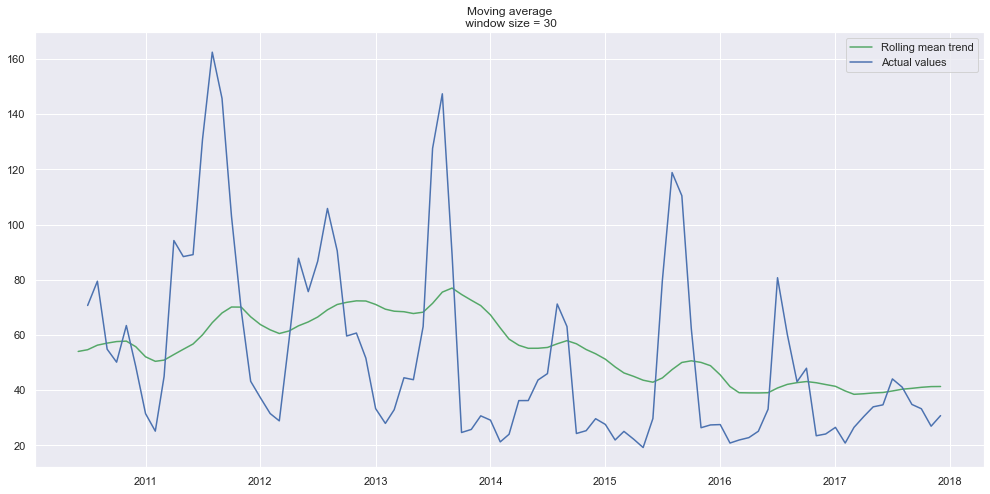

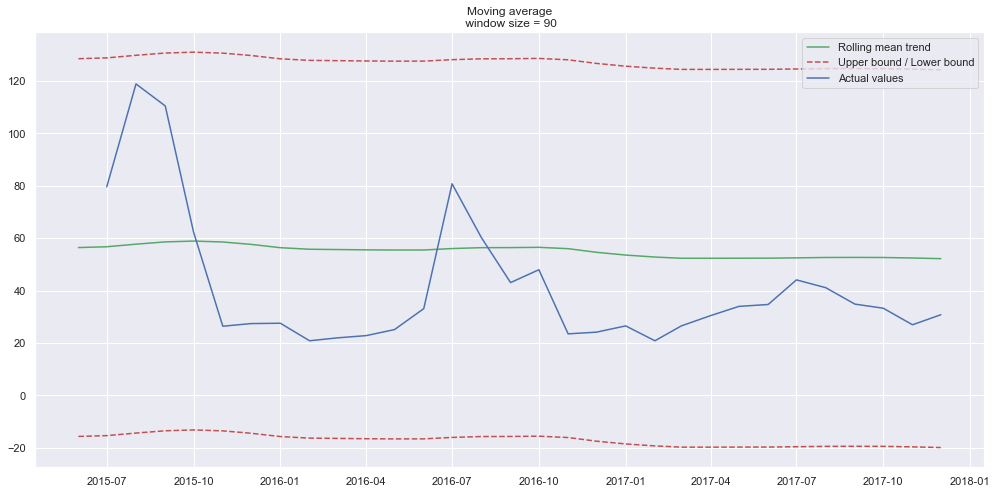

In [5]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)
    
#Smooth by the previous 5 days (by week)
plot_moving_average(data, 5)

#Smooth by the previous month (30 days)
plot_moving_average(data, 30)

#Smooth by previous quarter (90 days)
plot_moving_average(data, 90, plot_intervals=True)


In [ ]:
# Exponential Smoothing

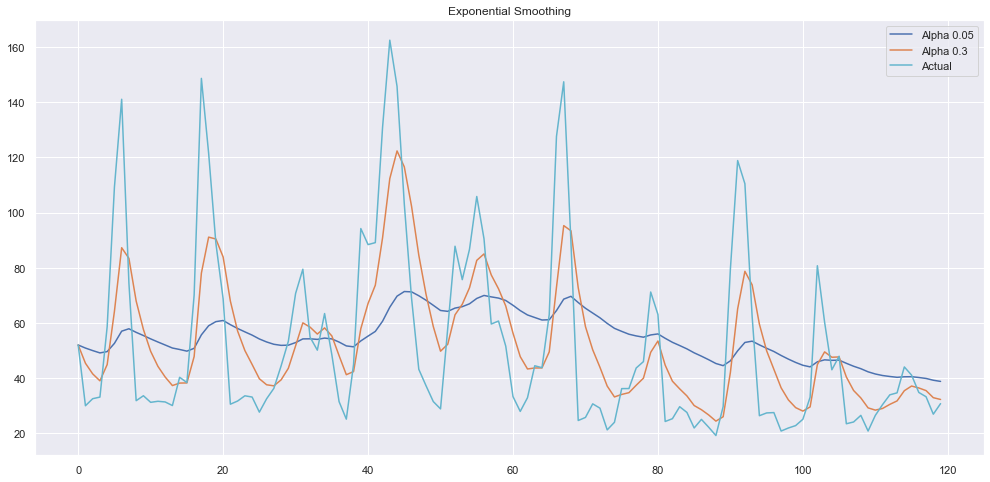

In [6]:
def exponential_smoothing(series, alpha):

    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result
  
def plot_exponential_smoothing(series, alphas):
 
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);

plot_exponential_smoothing(data.Consumption, [0.05, 0.3])


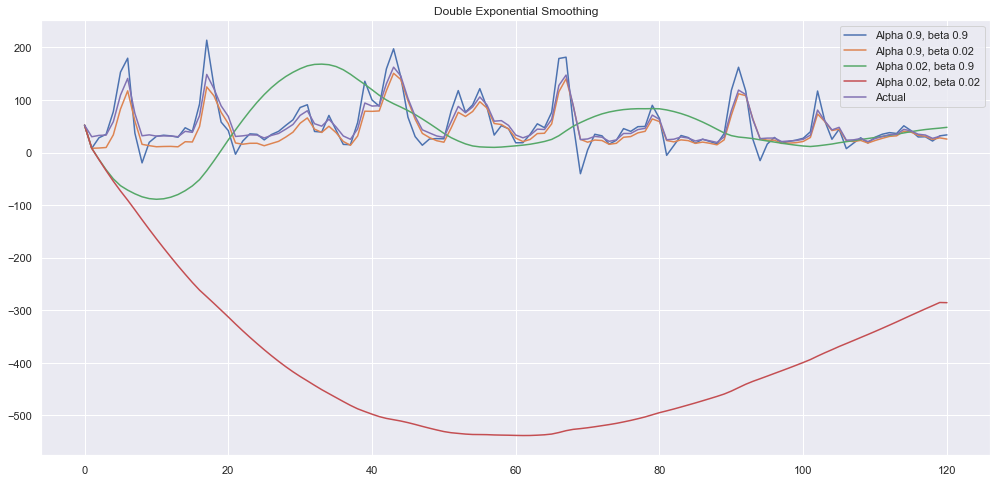

In [7]:
def double_exponential_smoothing(series, alpha, beta):

    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

def plot_double_exponential_smoothing(series, alphas, betas):
     
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)
    
plot_double_exponential_smoothing(data.Consumption, alphas=[0.9, 0.02], betas=[0.9, 0.02])


In [ ]:
# Double Exponential Smoothing

In [ ]:
# Modelling

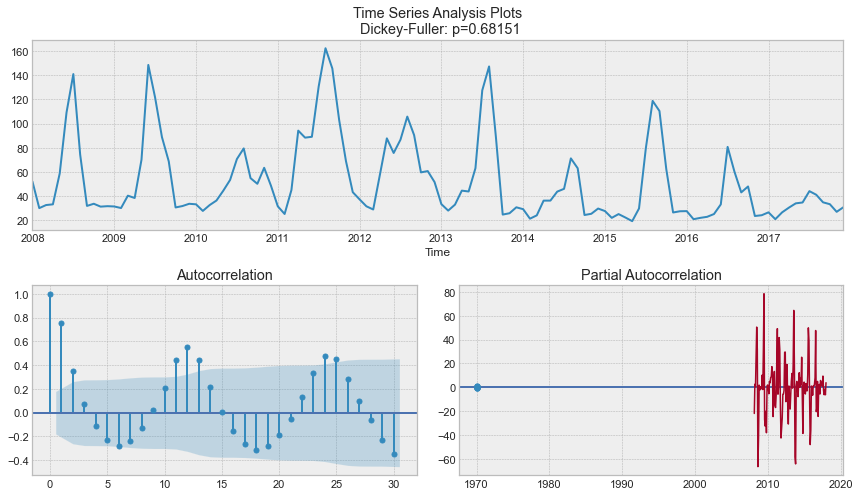

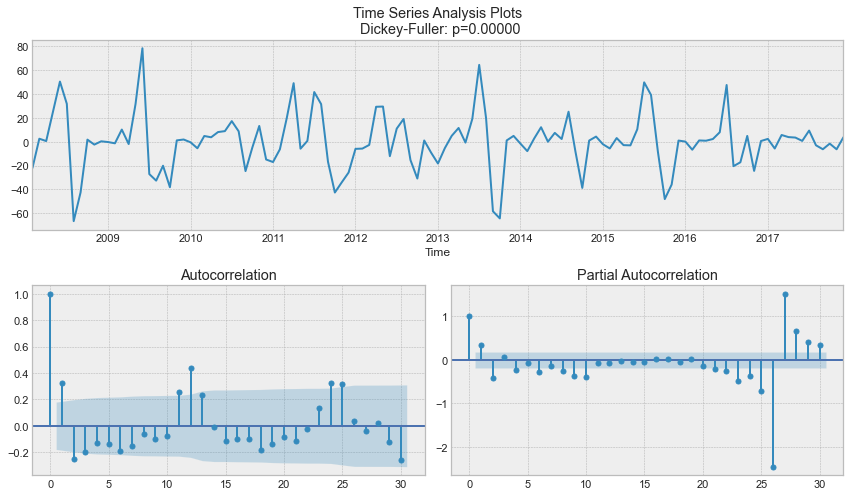

In [8]:
def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(data.Consumption, lags=30)

# Take the first difference to remove to make the process stationary

# create a differenced series
from pandas import Series
from pandas import datetime
from matplotlib import pyplot
 
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
 
difff = data['Consumption'].diff()
plt.plot(difff)
plt.show()

tsplot(difff[1:], lags=30)

In [ ]:
#By the Dickey-Fuller test, the time series is unsurprisingly non-stationary. Also, looking at the autocorrelation plot, and it seems that there is clear seasonality.
#Therefore, to make the process stationary, let’s take the first difference (line 23 in the code block). We simply subtract the time series from itself with a lag of one day, and we get the above modified plots.

In [ ]:
#SARIMA

In [9]:
#Set initial values and some bounds
ps = range(0, 5)
d = 1
qs = range(0, 5)
Ps = range(0, 5)
D = 1
Qs = range(0, 5)
s = 12

#Create a list with all possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Train many SARIMA models to find the best set of parameters
def optimize_SARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
    """
    
    results = []
    best_aic = float('inf')
    
    for param in tqdm_notebook(parameters_list):
        try: model = sm.tsa.statespace.SARIMAX(data.Consumption, order=(param[0], d, param[1]),
                                               seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        
        #Save best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])
        
    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    #Sort in ascending order, lower AIC is better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

result_table = optimize_SARIMA(parameters_list, d, D, s)

#Set parameters that give the lowest AIC (Akaike Information Criteria)
p, q, P, Q = result_table.parameters[0]

best_model = sm.tsa.statespace.SARIMAX(data.Consumption, order=(p, d, q),
                                       seasonal_order=(P, D, Q, s)).fit(disp=-1)

print(best_model.summary())



                                         SARIMAX Results                                          
Dep. Variable:                                Consumption   No. Observations:                  120
Model:             SARIMAX(1, 1, 2)x(2, 1, [1, 2, 3], 12)   Log Likelihood                -454.152
Date:                                    Wed, 16 Jun 2021   AIC                            926.305
Time:                                            21:26:54   BIC                            950.360
Sample:                                        01-01-2008   HQIC                           936.056
                                             - 12-01-2017                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2550      0.132      1.931      

In [10]:
best_model.predict(start='2018-01-01', end='2018-12-01')

2018-01-01    25.210222
2018-02-01     8.599562
2018-03-01    11.444769
2018-04-01    17.639864
2018-05-01    20.215512
2018-06-01    33.286448
2018-07-01    61.731503
2018-08-01    54.604140
2018-09-01    25.390756
2018-10-01    12.401706
2018-11-01    14.539047
2018-12-01    16.473648
Freq: MS, Name: predicted_mean, dtype: float64

No handles with labels found to put in legend.


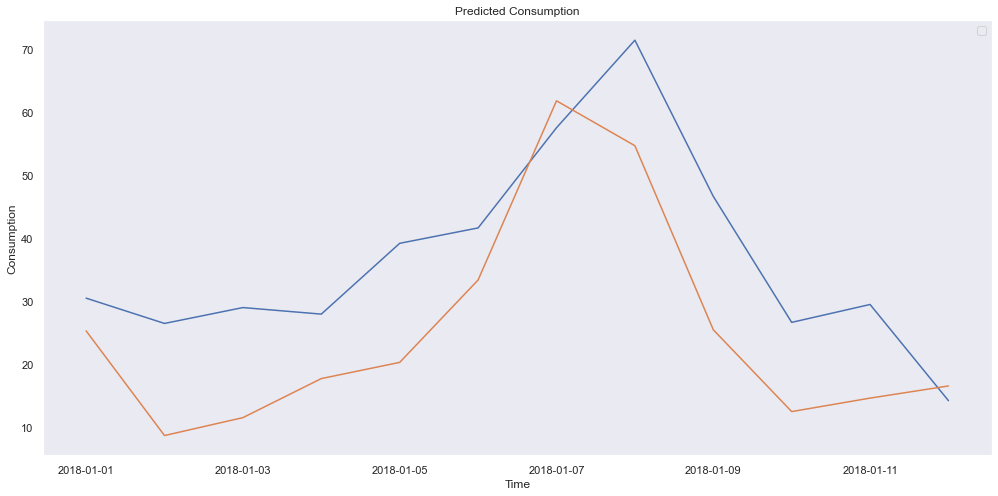

In [24]:
# Make a dataframe containing actual and predicted prices
comparison = pd.DataFrame({'actual': [30.405, 26.39, 28.91, 27.87, 39.11, 41.55,57.45,71.35,46.56,26.56,29.4,14.13],
                          'predicted': [25.21, 8.599, 11.44, 17.639, 20.21, 33.286,61.73,54.60,25.39,12.40,14.539,16.47]}, 
                          index = pd.date_range(start='2018-01-01', periods=12,))

y_true = [30.405, 26.39, 28.91, 27.87, 39.11, 41.55,57.45,71.35,46.56,26.56,29.4,14.13]
y_pred = [25.21, 8.599, 11.44, 17.639, 20.21, 33.286,61.73,54.60,25.39,12.40,14.539,16.47]
#Plot predicted vs actual price

plt.figure(figsize=(17, 8))
plt.plot(comparison.actual)
plt.plot(comparison.predicted)
plt.title('Predicted Consumption')
plt.ylabel('Consumption')
plt.xlabel('Time')
plt.legend(loc='best')
plt.grid(False)
plt.show()

In [25]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(y_true,y_pred)

37.22251962374249